# Imports & Load Data
作業に必要なライブラリをインポートして、 以下のデータを読み込みます。

* stock_price : 株価情報
* stock_list : 銘柄情報
* stock_fin : 財務諸表
* stock_labels : 目的変数

In [1]:
!pip install keras
!pip install tensorflow

    100% |████████████████████████████████| 394.3MB 65kB/s  eta 0:00:01 0% |▎                               | 3.1MB 3.0MB/s eta 0:02:13    0% |▎                               | 3.7MB 5.8MB/s eta 0:01:07    1% |▎                               | 4.0MB 4.5MB/s eta 0:01:26    1% |▌                               | 5.5MB 7.9MB/s eta 0:00:50    1% |▌                               | 6.4MB 5.7MB/s eta 0:01:09    1% |▋                               | 6.9MB 6.7MB/s eta 0:00:58    1% |▋                               | 7.3MB 5.5MB/s eta 0:01:11    1% |▋                               | 7.9MB 7.9MB/s eta 0:00:49    2% |▊                               | 8.4MB 14.1MB/s eta 0:00:28    3% |█▏                              | 14.7MB 10.2MB/s eta 0:00:38    7% |██▍                             | 28.8MB 16.1MB/s eta 0:00:23    18% |█████▉                          | 71.3MB 11.4MB/s eta 0:00:29    18% |█████▉                          | 71.9MB 11.7MB/s eta 0:00:28    19% |██████▎                         | 77.7MB 

    100% |████████████████████████████████| 1.0MB 10.0MB/s ta 0:00:01
    100% |████████████████████████████████| 133kB 12.7MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 10.7MB/s ta 0:00:01
    100% |████████████████████████████████| 3.7MB 5.8MB/s ta 0:00:011
    100% |████████████████████████████████| 51kB 7.7MB/s ta 0:00:01
    100% |████████████████████████████████| 14.8MB 2.9MB/s eta 0:00:01   14% |████▋                           | 2.2MB 13.7MB/s eta 0:00:01    66% |█████████████████████▎          | 9.9MB 10.2MB/s eta 0:00:01    90% |████████████████████████████▉   | 13.4MB 11.0MB/s eta 0:00:01
    100% |████████████████████████████████| 143kB 11.9MB/s ta 0:00:01
    100% |████████████████████████████████| 788kB 8.7MB/s eta 0:00:01
    100% |████████████████████████████████| 788kB 9.6MB/s eta 0:00:01
    100% |████████████████████████████████| 102kB 12.0MB/s a 0:00:01
    100% |████████████████████████████████| 163kB 11.9MB/s ta 0:00:01
    100% |████████████████

  Stored in directory: /root/.cache/pip/wheels/b1/c2/ed/d62208260edbd3fa7156545c00ef966f45f2063d0a84f8208a
  Stored in directory: /root/.cache/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built wrapt termcolor
tables 3.5.1 requires mock>=2.0, which is not installed.
astroid 2.2.5 requires typed-ast>=1.3.0; implementation_name == "cpython", which is not installed.
  Found existing installation: six 1.12.0
    Uninstalling six-1.12.0:
      Successfully uninstalled six-1.12.0
  Found existing installation: numpy 1.16.2
    Uninstalling numpy-1.16.2:
      Successfully uninstalled numpy-1.16.2
  Found existing installation: h5py 2.9.0
    Uninstalling h5py-2.9.0:
      Successfully uninstalled h5py-2.9.0
  Found existing installation: setuptools 40.8.0
    Uninstalling setuptools-40.8.0:
      Successfully uninstalled setuptools-40.8.0
  Found existing installation: wheel 0.33.1
    Uninstalling wheel-0.33.1:
      Successfully uninstalled wheel-0.33

In [299]:
import os
import pickle
import sys
import warnings
from glob import glob

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
import  xgboost as xgb
from scipy.stats import spearmanr
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm.auto import tqdm

# Sequentialのインポート
from keras.models import Sequential
# Dense、LSTMのインポート
from keras.layers import Dense, LSTM
import keras


# 表示用の設定を変更します
%matplotlib inline
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.width = 120

In [3]:
# python 3.7.3であることを確認します
import sys
print(sys.version)

3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


In [4]:
# データセット保存先ディレクトリ（""の中身はご自身の環境に合わせて定義してください。）
dataset_dir="/path/to"

In [168]:
# 読み込むファイルを定義します。
inputs = {
    "stock_list": f"{dataset_dir}/stock_list.csv.gz",
    "stock_price": f"{dataset_dir}/stock_price.csv.gz",
    "stock_fin": f"{dataset_dir}/stock_fin.csv.gz",
    # 本チュートリアルでは使用しないため、コメントアウトしています。
    "stock_fin_price": f"{dataset_dir}/stock_fin_price.csv.gz",
    "stock_labels": f"{dataset_dir}/stock_labels.csv.gz",
}

# ファイルを読み込みます
dfs = {}
for k, v in inputs.items():
    print(k)
    dfs[k] = pd.read_csv(v)

stock_list
stock_price
stock_fin
stock_fin_price


Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.


stock_labels


In [173]:
dfs['stock_fin_price'][dfs['stock_fin_price']['Local Code'] == 1301]

,base_date,Local Code,Result_FinancialStatement AccountingStandard,Result_FinancialStatement FiscalPeriodEnd,Result_FinancialStatement ReportType,Result_FinancialStatement FiscalYear,Result_FinancialStatement ModifyDate,Result_FinancialStatement CompanyType,Result_FinancialStatement ChangeOfFiscalYearEnd,Result_FinancialStatement NetSales,Result_FinancialStatement OperatingIncome,Result_FinancialStatement OrdinaryIncome,Result_FinancialStatement NetIncome,Result_FinancialStatement TotalAssets,Result_FinancialStatement NetAssets,Result_FinancialStatement CashFlowsFromOperatingActivities,Result_FinancialStatement CashFlowsFromFinancingActivities,Result_FinancialStatement CashFlowsFromInvestingActivities,Forecast_FinancialStatement AccountingStandard,Forecast_FinancialStatement FiscalPeriodEnd,Forecast_FinancialStatement ReportType,Forecast_FinancialStatement FiscalYear,Forecast_FinancialStatement ModifyDate,Forecast_FinancialStatement CompanyType,Forecast_FinancialStatement ChangeOfFiscalYearEnd,Forecast_FinancialStatement NetSales,Forecast_FinancialStatement OperatingIncome,Forecast_FinancialStatement OrdinaryIncome,Forecast_FinancialStatement NetIncome,Result_Dividend FiscalPeriodEnd,Result_Dividend ReportType,Result_Dividend FiscalYear,Result_Dividend ModifyDate,Result_Dividend RecordDate,Result_Dividend DividendPayableDate,Result_Dividend QuarterlyDividendPerShare,Result_Dividend AnnualDividendPerShare,Forecast_Dividend FiscalPeriodEnd,Forecast_Dividend ReportType,Forecast_Dividend FiscalYear,Forecast_Dividend ModifyDate,Forecast_Dividend RecordDate,Forecast_Dividend QuarterlyDividendPerShare,Forecast_Dividend AnnualDividendPerShare,EndOfDayQuote Date,EndOfDayQuote Open,EndOfDayQuote High,EndOfDayQuote Low,EndOfDayQuote Close,EndOfDayQuote ExchangeOfficialClose,EndOfDayQuote Volume,EndOfDayQuote CumulativeAdjustmentFactor,EndOfDayQuote PreviousClose,EndOfDayQuote PreviousCloseDate,EndOfDayQuote PreviousExchangeOfficialClose,EndOfDayQuote PreviousExchangeOfficialCloseDate,EndOfDayQuote ChangeFromPreviousClose,EndOfDayQuote PercentChangeFromPreviousClose,EndOfDayQuote VWAP
0,2016/01/04,1301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016/01/04,2800.0,2820.0,2740.0,2750.0,2750.0,32000.0,0.1,2770.0,2015/12/30,2770.0,2015/12/30,-20.0,-0.722,2778.250
3233,2016/01/05,1301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016/01/05,2750.0,2780.0,2750.0,2760.0,2760.0,20100.0,0.1,2750.0,2016/01/04,2750.0,2016/01/04,10.0,0.364,2761.990
6466,2016/01/06,1301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016/01/06,2760.0,2770.0,2740.0,2760.0,2760.0,15000.0,0.1,2760.0,2016/01/05,2760.0,2016/01/05,0.0,0.000,2758.867
9699,2016/01/07,1301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016/01/07,2740.0,2760.0,2710.0,2710.0,2710.0,31400.0,0.1,2760.0,2016/01/06,2760.0,2016/01/06,-50.0,-1.812,2733.471
12932,2016/01/08,1301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016/01/08,2700.0,2740.0,2690.0,2700.0,2700.0,26200.0,0.1,2710.0,2016/01/07,2710.0,2016/01/07,-10.0,-0.369,2709.122
16165,2016/01/12,1301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016/01/12,2700.0,2730.0,2640.0,2640.0,2640.0,27500.0,0.1,2700.0,2016/01/08,2700.0,2016/01/08,-60.0,-2.222,2671.927
19398,2016/01/13,1301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [175]:
dfs['stock_labels']

,base_date,Local Code,label_date_5,label_high_5,label_low_5,label_date_10,label_high_10,label_low_10,label_date_20,label_high_20,label_low_20
0,2016-01-04,1301,2016-01-12,0.01091,-0.04000,2016-01-19,0.01091,-0.05455,2016-02-02,0.01091,-0.08727
1,2016-01-05,1301,2016-01-13,0.00362,-0.04348,2016-01-20,0.00362,-0.07609,2016-02-03,0.00362,-0.09058
2,2016-01-06,1301,2016-01-14,0.00000,-0.05072,2016-01-21,0.00000,-0.08696,2016-02-04,0.00362,-0.09058
3,2016-01-07,1301,2016-01-15,0.01107,-0.03321,2016-01-22,0.01107,-0.07380,2016-02-05,0.02214,-0.07380
4,2016-01-08,1301,2016-01-18,0.01111,-0.03333,2016-01-25,0.01111,-0.07037,2016-02-08,0.02593,-0.07037
5,2016-01-12,1301,2016-01-19,0.02652,-0.01515,2016-01-26,0.02652,-0.04924,2016-02-09,0.04924,-0.04924
6,2016-01-13,1301,2016-01-20,-0.01115,-0.05204,2016-01-27,-0.01115,-0.06691,2016-02-10,0.02974,-0.06691
7,2016-01-14,1301,2016-01-21,0.01141,-0.04183,2016-01-28,0.01521,-0.04563,2016-02-12,0.05323,-0.04943
8,2016-01-15,1301,2016-01-22,-0.00377,-0.05283,2016-01-29,0.03019,-0.05283,2016-02-15,0.04528,-0.05660
9,2016-01-18,1301,2016-01-25,0.00380,-0.04563,2016-02-01,0.05323,-0.04563,2016-02-16,0.05323,-0.04943


# 特徴量の生成

In [6]:
FEATURES = ['MA_gap_2month',
            'MA_gap_3month',
            'volatility_2month',
            'volatility_3month',
            'Result_Dividend FiscalYear',
            'return_3month',
            'Forecast_Dividend FiscalYear',
            'volatility_1month',
            'Forecast_FinancialStatement FiscalYear',
            'MA_gap_1month',
            'pbr',
            'Result_FinancialStatement FiscalYear',
            'return_1month',
            'ema_12',
            'Result_FinancialStatement TotalAssets',
            'signal',
            'Previous_FinancialStatement NetIncome',
            'per',
            'Result_FinancialStatement CashFlowsFromOperatingActivities',
            'Result_FinancialStatement CashFlowsFromInvestingActivities',
            'ema_10']

In [7]:
def get_feature_columns(dfs, train_X, column_group="fundamental+technical"):
    # 特徴量グループを定義
    # ファンダメンタル
    fundamental_cols = dfs["stock_fin"].select_dtypes("float64").columns
    fundamental_cols = fundamental_cols[
        fundamental_cols != "Result_Dividend DividendPayableDate"
        ]
    fundamental_cols = fundamental_cols[fundamental_cols != "Local Code"]
    # 価格変化率
    returns_cols = [x for x in train_X.columns if "return" in x]
    # テクニカル
    technical_cols = [
        x for x in train_X.columns if
        (x not in fundamental_cols) and (x != "code")
    ]
    columns = {
        "fundamental_only": fundamental_cols,
        "return_only": returns_cols,
        "technical_only": technical_cols,
        "fundamental+technical": list(fundamental_cols) + list(
            technical_cols),
        "selected_columns":FEATURES,
    }
    return columns[column_group]

In [176]:
model_path = os.path.join(os.path.dirname("__file__"), "../model")
test_X_path = os.path.join(os.path.dirname("__file__"), "../model/proceed_datas/test_X")
test_y_path = os.path.join(os.path.dirname("__file__"), "../model/proceed_datas/test_y")
val_X_path = os.path.join(os.path.dirname("__file__"), "../model/proceed_datas/val_X")
val_y_path = os.path.join(os.path.dirname("__file__"), "../model/proceed_datas/val_y")
train_X_path = os.path.join(os.path.dirname("__file__"), "../model/proceed_datas/train_X")
train_y_path = os.path.join(os.path.dirname("__file__"), "../model/proceed_datas/train_y")

In [177]:
# 対象の目的変数を定義
labels = {
#    "label_high_5",
#    "label_high_10",
    "label_high_20",
#    "label_low_5",
#    "label_low_10",
    "label_low_20",
}

In [178]:
# 特徴量追加済みデータ
proceed_datas = {
    "train_X",
    "train_y",
    "val_X",
    "val_y
    "test_X",
    "test_y"
}

SyntaxError: EOL while scanning string literal (<ipython-input-178-74898677a046>, line 6)

In [179]:
label = 'label_high_20'
data_X = os.path.join(train_X_path, f"train_X_{label}.pkl")
with open(data_X , "rb") as f:
    train_X = pickle.load(f)
data_y = os.path.join(train_y_path, f"train_y_{label}.pkl")
with open(data_y , "rb") as f:
    train_y = pickle.load(f)
    
data_X = os.path.join(test_X_path, f"test_X_{label}.pkl")
with open(data_X , "rb") as f:
    test_X = pickle.load(f)
data_y = os.path.join(test_y_path, f"test_y_{label}.pkl")
with open(data_y , "rb") as f:
    test_y = pickle.load(f)
    
data_X = os.path.join(val_X_path, f"val_X_{label}.pkl")
with open(data_X , "rb") as f:
    val_X = pickle.load(f)
data_y = os.path.join(val_y_path, f"val_y_{label}.pkl")
with open(data_y , "rb") as f:
    val_y = pickle.load(f)

In [180]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape, val_X.shape, val_y.shape

((31752, 64), (31752,), (32515, 64), (32515,), (14585, 64), (14585,))

In [389]:
# ネットワークの各層のサイズの定義
num_l1 = 500
num_l2 = 300
num_output = 1

# 以下、ネットワークを構築
model = Sequential()
# 第1層
model.add(Dense(num_l1, activation='relu', input_shape=(train_X.shape[1], )))
# 第2層
model.add(Dense(num_l2, activation='relu'))
# 出力層
model.add(Dense(num_output))
# ネットワークのコンパイル
model.compile(loss='mse', optimizer=keras.optimizers.Adam(0.001), metrics=['mae'])

In [390]:
model.summary()

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 500)               32500     
_________________________________________________________________
dense_116 (Dense)            (None, 300)               150300    
_________________________________________________________________
dense_117 (Dense)            (None, 1)                 301       
Total params: 183,101
Trainable params: 183,101
Non-trainable params: 0
_________________________________________________________________


In [391]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [392]:
result = model.fit(x=train_X, y=train_y, epochs=1000, validation_data=(val_X, val_y), callbacks=[early_stop])

Epoch 1/1000
993/993 [==============================] - 4s 3ms/step - loss: 2625109410072868.5000 - mae: 6896435.8989 - val_loss: 11412109787136.0000 - val_mae: 845148.6875
Epoch 2/1000
993/993 [==============================] - 3s 3ms/step - loss: 1037931648923223.6250 - mae: 3077075.7303 - val_loss: 156134409240576.0000 - val_mae: 1186792.0000
Epoch 3/1000
993/993 [==============================] - 3s 3ms/step - loss: 446182970355588.3750 - mae: 2249859.9152 - val_loss: 52824801017856.0000 - val_mae: 1330273.7500
Epoch 4/1000
993/993 [==============================] - 3s 3ms/step - loss: 331630938285103.3750 - mae: 2168892.4367 - val_loss: 6910065508352.0000 - val_mae: 423865.7812
Epoch 5/1000
993/993 [==============================] - 3s 3ms/step - loss: 2852909432419103.5000 - mae: 3824234.2148 - val_loss: 14436707336192.0000 - val_mae: 468312.3750
Epoch 6/1000
993/993 [==============================] - 3s 3ms/step - loss: 1445853876774990.2500 - mae: 2478522.5711 - val_loss: 21371

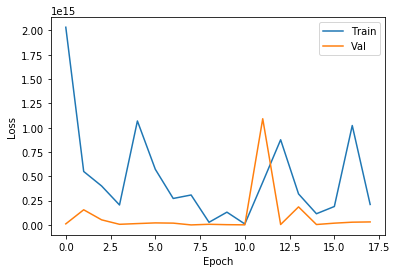

In [393]:
# matplotlibのインポート
from matplotlib import pyplot as plt

# 折れ線グラフによる学習データの損失の描画
plt.plot(result.history['loss'])

# 折れ線グラフによる検証データの損失の描画
plt.plot(result.history['val_loss'])

# 凡例の指定
plt.legend(['Train', 'Val'])

# グラフの軸タイトルの指定
plt.xlabel('Epoch')
plt.ylabel('Loss')

# 描画の実行
plt.show()

In [252]:
data_X = os.path.join(test_X_path, f"test_X_{label}.pkl")
with open(data_X , "rb") as f:
    test_X = pickle.load(f)
data_y = os.path.join(test_y_path, f"test_y_{label}.pkl")
with open(data_y , "rb") as f:
    test_y = pickle.load(f)

In [394]:
loss, accuracy = model.evaluate(test_X, test_y)

1017/1017 [==============================] - 1s 1ms/step - loss: 89163319738368.0000 - mae: 569024.7500


In [343]:
# 評価データの正解率の表示
print('評価データの正解率:', accuracy)

評価データの正解率: 0.6531992554664612


In [395]:
loss

89163319738368.0

In [396]:
pred = model.predict(test_X)

In [348]:
test_X.head(20)

,return_1month,return_2month,return_3month,volatility_1month,volatility_2month,volatility_3month,MA_gap_1month,MA_gap_2month,MA_gap_3month,EWMA,ema_10,ema_12,ema_26,macd,signal,pbr,per,Result_FinancialStatement FiscalYear,Result_FinancialStatement NetSales,Result_FinancialStatement OperatingIncome,Result_FinancialStatement OrdinaryIncome,Result_FinancialStatement NetIncome,Result_FinancialStatement TotalAssets,Result_FinancialStatement NetAssets,Result_FinancialStatement CashFlowsFromOperatingActivities,Result_FinancialStatement CashFlowsFromFinancingActivities,Result_FinancialStatement CashFlowsFromInvestingActivities,Forecast_FinancialStatement FiscalYear,Forecast_FinancialStatement NetSales,Forecast_FinancialStatement OperatingIncome,Forecast_FinancialStatement OrdinaryIncome,Forecast_FinancialStatement NetIncome,Result_Dividend FiscalYear,Result_Dividend QuarterlyDividendPerShare,Result_Dividend AnnualDividendPerShare,Forecast_Dividend FiscalYear,Forecast_Dividend QuarterlyDividendPerShare,Forecast_Dividend AnnualDividendPerShare,IssuedShareEquityQuote IssuedShare,Section/Products,33 Sector(Code),17 Sector(Code),Previous_FinancialStatement NetSales,Previous_FinancialStatement OperatingIncome,Previous_FinancialStatement OrdinaryIncome,Previous_FinancialStatement NetIncome,Previous_FinancialStatement TotalAssets,Previous_FinancialStatement NetAssets,Previous_FinancialStatement CashFlowsFromOperatingActivities,Previous_FinancialStatement CashFlowsFromFinancingActivities,Previous_FinancialStatement CashFlowsFromInvestingActivities,operating_profit_margin,ordinary_profit_margin,net_profit_margin,total_asset_turnover,net_sales_growth_rate,ordinary_income_growth_rate,operationg_income_growth_rate,total_assets_growth_rate,net_assets_growth_rate,eps,bps,roe,code
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-02-08,-0.029990,-0.115094,-0.068212,0.009129,0.019928,0.019123,0.999325,0.979481,0.952214,2809.628787,2808.901841,2810.251424,2839.679516,-29.428092,-39.914841,9.752383e+05,1.229596e+07,2019.0,197783.0,3280.0,3923.0,2501.0,130246.0,31533.0,0.0,0.0,0.0,2019.0,267000.0,4800.0,4600.0,3200.0,2018.0,60.0,60.0,2019.0,60.0,60.0,10928283.0,1,50,1,256151.0,3831.0,4434.0,2914.0,114673.0,31996.0,-4118.0,5958.0,-2494.0,1.658383,1.983487,1.264517,627.225446,-22.786559,-11.524583,-14.382668,13.580355,-1.447056,0.000229,0.002885,7.931373,1301
2019-05-13,0.005413,-0.071333,-0.019359,0.013405,0.015306,0.013476,1.001132,0.974970,0.963442,2754.939314,2761.369792,2766.126352,2801.777661,-35.651308,-37.034735,9.515626e+05,1.044825e+07,2019.0,256151.0,3831.0,4434.0,2914.0,114673.0,31996.0,-4118.0,5958.0,-2494.0,2020.0,286000.0,5500.0,5400.0,3800.0,2019.0,70.0,70.0,2020.0,70.0,70.0,10928283.0,1,50,1,62644.0,770.0,1015.0,706.0,122181.0,31540.0,0.0,0.0,0.0,1.495602,1.731010,1.137610,800.571946,308.899496,336.847291,397.532468,-6.144982,1.445783,0.000267,0.002928,9.107388,1301
2019-08-02,-0.004950,0.136878,0.107641,0.009575,0.011843,0.012424,0.987424,1.030734,1.049274,3052.050178,3052.607354,3050.020115,3006.565435,43.454681,57.139714,1.044666e+06,4.666965e+07,2020.0,62644.0,770.0,1015.0,706.0,122181.0,31540.0,0.0,0.0,0.0,2020.0,286000.0,5500.0,5400.0,3800.0,2019.0,70.0,70.0,2020.0,70.0,70.0,10928283.0,1,50,1,126884.0,735.0,1128.0,710.0,119707.0,31762.0,0.0,0.0,0.0,1.229168,1.620267,1.127003,198.617628,-50.628921,-10.017730,4.761905,2.066713,-0.698948,0.000065,0.002886,2.238427,1301
2019-11-05,0.055733,0.041681,0.009504,0.010274,0.011027,0.011192,1.030296,1.037502,1.038070,2927.648702,2918.216106,2912.973098,2891.203474,21.769624,14.124741,1.023258e+06,4.577565e+07,2020.0,126884.0,735.0,1128.0,710.0,119707.0,31762.0,0.0,0.0,0.0,2020.0,280000.0,4000.0,4500.0,3000.0,2019.0,70.0,70.0,2020.0,70.0,70.0,10928283.0,1,50,1,205436.0,2616.0,2979.0,1739.0,131659.0,33405.0,0.0,0.0,0.0,0.579269,0.889001,0.559566,399.483660,-38.236726,-62.134945,-71.903670,-9.077997,-4.918425,0.000065,0.002906,2.235376,1301
2020-02-07,-0.015343,0.004871

In [374]:
test_y.head(10)

datetime
2019-02-08    0.07854
2019-05-13    0.04379
2019-08-02    0.00498
2019-11-05    0.00841
2020-02-07    0.01212
2020-05-12    0.06815
2020-08-07    0.02430
2020-11-06    0.02804
2019-02-05    0.08726
2019-05-14    0.02496
Name: label_high_20, dtype: float64

In [398]:
pred[:5]

array([[ 6.3295215e-01],
       [ 6.3295215e-01],
       [-1.1867366e+04],
       [-1.1150417e+04],
       [ 6.3295215e-01]], dtype=float32)

In [399]:
np.average(pred)

-72456.57

In [310]:
test_y

datetime
2019-02-08    0.07854
2019-05-13    0.04379
2019-08-02    0.00498
2019-11-05    0.00841
2020-02-07    0.01212
2020-05-12    0.06815
2020-08-07    0.02430
2020-11-06    0.02804
2019-02-05    0.08726
2019-05-14    0.02496
2019-08-05    0.04815
2019-11-05    0.07704
2020-02-05    0.02265
2020-05-20    0.09691
2020-08-03    0.07742
2020-11-05    0.07914
2019-02-04    0.01337
2019-05-13    0.06452
2019-08-05   -0.07231
2019-11-05    0.07156
2020-02-03    0.00264
2020-05-14    0.05987
2020-08-03    0.15985
2020-11-02    0.04011
2019-01-31    0.06735
2019-05-14    0.04994
2019-07-30    0.00727
2019-10-31    0.04225
2020-01-31    0.06793
2020-05-15    0.07786
2020-07-30    0.03911
2020-10-30    0.12338
2019-01-07    0.02332
2019-04-04    0.00759
2019-07-12    0.01145
2019-10-02    0.15957
2020-01-06    0.03357
2020-04-02    0.22848
2020-07-14    0.12955
2020-10-02    0.03734
2019-01-11    0.11310
2019-04-04   -0.01205
2019-07-10    0.13323
2019-10-04   -0.00137
2020-01-09   -0.00943
2

In [222]:
# ライブラリのインポート
import numpy as np
from sklearn.metrics import accuracy_score

# 評価データの予測結果の算出
pred_prob = model.predict(test_X)

# 予測結果の先頭10件を確認
print('予測結果の先頭10件')
print(pred_prob[:10])

# 評価データの正解率の計算
accuracy = accuracy_score(y_true=test_y, y_pred=pred)

# 評価データの正解率の表示
print('評価データの正解率:', accuracy)

予測結果の先頭10件
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]


ValueError: Found input variables with inconsistent numbers of samples: [32515, 3523]

In [228]:
np.average(pred_prob)

-1.0

In [57]:
test_y.shape

(3523, 21)

In [59]:
pred.shape

(3523, 1)

In [143]:
val_X_path = os.path.join(os.path.dirname("__file__"), "../model/proceed_datas/val_X")
val_y_path = os.path.join(os.path.dirname("__file__"), "../model/proceed_datas/val_y")

In [144]:
data_X = os.path.join(val_X_path, f"val_X_{label}.pkl")
with open(data_X , "rb") as f:
    val_X = pickle.load(f)
data_y = os.path.join(val_y_path, f"val_y_{label}.pkl")
with open(data_y , "rb") as f:
    val_y = pickle.load(f)

In [154]:
val_X['code'].value_counts

<bound method IndexOpsMixin.value_counts of datetime
2018-02-09    1301
2018-05-10    1301
2018-08-03    1301
2018-11-05    1301
2018-02-05    1332
2018-05-14    1332
2018-08-03    1332
2018-11-05    1332
2018-02-05    1333
2018-05-07    1333
2018-08-06    1333
2018-11-05    1333
2018-05-14    1352
2018-07-31    1352
2018-10-31    1352
2018-04-05    1376
2018-07-13    1376
2018-10-02    1376
2018-04-06    1377
2018-07-11    1377
2018-10-05    1377
2018-02-02    1379
2018-05-08    1379
2018-05-11    1379
2018-08-02    1379
2018-11-02    1379
2018-02-05    1380
2018-05-11    1380
2018-08-06    1380
2018-11-05    1380
2018-04-27    1381
2018-08-10    1381
2018-10-26    1381
2018-02-06    1382
2018-02-07    1382
2018-05-09    1382
2018-08-09    1382
2018-08-10    1382
2018-11-09    1382
2018-03-16    1383
2018-06-08    1383
2018-09-10    1383
2018-05-11    1384
2018-08-10    1384
2018-11-13    1384
2018-02-14    1400
2018-05-15    1400
2018-05-24    1400
2018-08-10    1400
2018-11-14    14

In [146]:
val_y.shape

(14585,)

In [135]:
train_X_path = os.path.join(os.path.dirname("__file__"), "../model/proceed_datas/train_X")
train_y_path = os.path.join(os.path.dirname("__file__"), "../model/proceed_datas/train_y")

In [139]:
data_X = os.path.join(train_X_path, f"train_X_{label}.pkl")
with open(data_X , "rb") as f:
    train_X = pickle.load(f)
data_y = os.path.join(train_y_path, f"train_y_{label}.pkl")
with open(data_y , "rb") as f:
    train_y = pickle.load(f)

In [141]:
train_X.shape

(31752, 64)

In [142]:
train_y.shape

(31752,)

In [155]:
test_X_path = os.path.join(os.path.dirname("__file__"), "../model/proceed_datas/test_X")
test_y_path = os.path.join(os.path.dirname("__file__"), "../model/proceed_datas/test_y")

In [157]:
data_X = os.path.join(test_X_path, f"test_X_{label}.pkl")
with open(data_X , "rb") as f:
    test_X = pickle.load(f)
data_y = os.path.join(test_y_path, f"test_y_{label}.pkl")
with open(data_y , "rb") as f:
    test_y = pickle.load(f)

In [166]:
val_X.columns

Index(['return_1month', 'return_2month', 'return_3month', 'volatility_1month', 'volatility_2month',
       'volatility_3month', 'MA_gap_1month', 'MA_gap_2month', 'MA_gap_3month', 'EWMA', 'ema_10', 'ema_12', 'ema_26',
       'macd', 'signal', 'pbr', 'per', 'Result_FinancialStatement FiscalYear', 'Result_FinancialStatement NetSales',
       'Result_FinancialStatement OperatingIncome', 'Result_FinancialStatement OrdinaryIncome',
       'Result_FinancialStatement NetIncome', 'Result_FinancialStatement TotalAssets',
       'Result_FinancialStatement NetAssets', 'Result_FinancialStatement CashFlowsFromOperatingActivities',
       'Result_FinancialStatement CashFlowsFromFinancingActivities',
       'Result_FinancialStatement CashFlowsFromInvestingActivities', 'Forecast_FinancialStatement FiscalYear',
       'Forecast_FinancialStatement NetSales', 'Forecast_FinancialStatement OperatingIncome',
       'Forecast_FinancialStatement OrdinaryIncome', 'Forecast_FinancialStatement NetIncome',
       

In [24]:
for label in tqdm(labels):
    data_X = os.path.join(train_X_path, f"train_X_{label}.pkl")
    with open(data_X , "rb") as f:
        train_X = pickle.load(f)
    data_y = os.path.join(train_y_path, f"train_y_{label}.pkl")
    with open(data_y , "rb") as f:
        train_y = pickle.load(f)
        
    feature_columns = get_feature_columns(dfs, train_X, column_group='selected_columns')
    # 訓練実施
    reg_cv.fit(train_X[feature_columns].values, train_y.values)

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.8s finished
You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.8s finished


In [25]:
# 結果を表示
print(reg_cv.best_params_)
print(reg_cv.best_score_)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 700, 'random_state': 0}
0.014773336891030072


In [26]:
best_model = reg_cv.best_estimator_

In [27]:
SELECT_FIN_DATA_COLUMNS = ['Result_FinancialStatement FiscalYear', 'Result_FinancialStatement NetSales',
       'Result_FinancialStatement OperatingIncome', 'Result_FinancialStatement OrdinaryIncome',
       'Result_FinancialStatement NetIncome', 'Result_FinancialStatement TotalAssets',
       'Result_FinancialStatement NetAssets', 'Result_FinancialStatement CashFlowsFromOperatingActivities',
       'Result_FinancialStatement CashFlowsFromFinancingActivities',
       'Result_FinancialStatement CashFlowsFromInvestingActivities', 'Forecast_FinancialStatement FiscalYear',
       'Forecast_FinancialStatement NetSales', 'Forecast_FinancialStatement OperatingIncome',
       'Forecast_FinancialStatement OrdinaryIncome', 'Forecast_FinancialStatement NetIncome',
       'Result_Dividend FiscalYear', 'Result_Dividend QuarterlyDividendPerShare',
       'Result_Dividend AnnualDividendPerShare', 'Forecast_Dividend FiscalYear',
       'Forecast_Dividend QuarterlyDividendPerShare', 'Forecast_Dividend AnnualDividendPerShare',
       'IssuedShareEquityQuote IssuedShare','Section/Products', '33 Sector(Code)', '17 Sector(Code)']

In [28]:
# 学習用データセット定義
# ファンダメンタル情報
#fundamental_cols = dfs["stock_fin"].select_dtypes("float64").columns
fundamental_cols = pd.Index(SELECT_FIN_DATA_COLUMNS)
fundamental_cols = fundamental_cols[fundamental_cols != "Result_Dividend DividendPayableDate"]
fundamental_cols = fundamental_cols[fundamental_cols != "Local Code"]
# 価格変化率
returns_cols = [x for x in train_X.columns if "return" in x]
# テクニカル
technical_cols = [x for x in train_X.columns if (x not in fundamental_cols) and (x != "code")]

In [29]:
columns = {
    "fundamental_only": fundamental_cols,
    "return_only": returns_cols,
    "technical_only": technical_cols,
    "fundamental+technical": list(fundamental_cols) + list(technical_cols),
    "selected_columns":FEATURES,
}

In [30]:
# 結果保存用
all_results = dict()
all_results['XGB'] = dict()

In [31]:
for label in labels:
    data_X = os.path.join(test_X_path, f"test_X_{label}.pkl")
    with open(data_X , "rb") as f:
        test_X = pickle.load(f)
    data_y = os.path.join(test_y_path, f"test_y_{label}.pkl")
    with open(data_y , "rb") as f:
        test_y = pickle.load(f)
    # データセット毎に処理
    for col in columns.keys():
        result = dict()
        # 目的変数毎に処理
        for label in tqdm(labels):
            if len(test_X[columns[col]]) > 0:
                # モデル取得
                pred_model = best_model
                # 学習
                pred_model.fit(train_X[columns[col]].values, train_y)
                # 結果データ作成
                result[label] = test_X[["code"]].copy()
                result[label]["datetime"] = test_X[columns[col]].index
                # 予測
                result[label]["predict"] = pred_model.predict(test_X[columns[col]].values)
                result[label]["predict_dir"] = np.sign(result[label]["predict"])
                # 実際の結果
                result[label]["actual"] = test_y.values
                result[label]["actual_dir"] = np.sign(result[label]["actual"])
                result[label].dropna(inplace=True)

        all_results['XGB'][col] = result

In [32]:
results = []
for model in all_results.keys():
    for col in all_results[model]:
        tmp = pd.concat(all_results[model][col])
        tmp["model"] = model
        tmp["feature"] = col
        results.append(tmp)
results = pd.concat(results)
results["label"] = [x[0] for x in results.index]
results.head(5)

code   datetime   predict  predict_dir   actual  actual_dir model           feature  \
              datetime                                                                                          
label_high_20 2019-02-08  1301 2019-02-08  0.080065          1.0  0.07854         1.0   XGB  fundamental_only   
              2019-05-13  1301 2019-05-13  0.080034          1.0  0.04379         1.0   XGB  fundamental_only   
              2019-08-02  1301 2019-08-02  0.080197          1.0  0.00498         1.0   XGB  fundamental_only   
              2019-11-05  1301 2019-11-05  0.080164          1.0  0.00841         1.0   XGB  fundamental_only   
              2020-02-07  1301 2020-02-07  0.080093          1.0  0.01212         1.0   XGB  fundamental_only   

                                  label  
              datetime                   
label_high_20 2019-02-08  label_high_20  
              2019-05-13  label_high_20  
              2019-08-02  label_high_20  
              2019-11-05  label_high_20  
              2020-02-07  label_high_20

In [33]:
# 結果保存用変数
all_metrics = []

# データセット毎に処理
for feature in columns:
    matrix = dict()
    # 目的変数毎に処理
    for label in labels:
        # 処理対象データに絞り込み
        tmp_df = results[(results["model"] == "XGB") & (results["label"] == label) & (results["feature"] == feature)]
        # RMSE
        rmse = np.sqrt(mean_squared_error(tmp_df["predict"], tmp_df["actual"]))
        # 精度
        accuracy = accuracy_score(tmp_df["predict_dir"], tmp_df["actual_dir"])
        # 相関係数
        corr = np.corrcoef(tmp_df["actual"], tmp_df["predict"])[0, 1]
        # 順位相関
        spearman_corr = spearmanr(tmp_df["actual"], tmp_df["predict"])[0]
        # 結果を保存
        matrix[label] = [rmse, accuracy, spearman_corr,corr, corr**2, feature, model, tmp_df.shape[0]]
    res = pd.DataFrame.from_dict(matrix).T
    res.columns = ["RMSE","accuracy","spearman_corr","corr","R^2 score","feature", "model", "# of samples"]
    all_metrics.append(res)
all_metrics = pd.concat(all_metrics)
all_metrics.reset_index()

,index,RMSE,accuracy,spearman_corr,corr,R^2 score,feature,model,# of samples
0,label_low_20,0.16578,0.832293,0.0483929,0.138538,0.0191927,fundamental_only,XGB,32515
1,label_high_20,0.16578,0.832293,0.0483929,0.138538,0.0191927,fundamental_only,XGB,32515
2,label_low_20,0.166988,0.832293,0.115974,0.116173,0.0134962,return_only,XGB,32515
3,label_high_20,0.166988,0.832293,0.115974,0.116173,0.0134962,return_only,XGB,32515
4,label_low_20,0.16285,0.832293,0.305545,0.291733,0.0851083,technical_only,XGB,32515
5,label_high_20,0.16285,0.832293,0.305545,0.291733,0.0851083,technical_only,XGB,32515
6,label_low_20,0.162457,0.832293,0.283354,0.291267,0.0848365,fundamental+technical,XGB,32515
7,label_high_20,0.162457,0.832293,0.283354,0.291267,0.0848365,fundamental+technical,XGB,32515
8,label_low_20,0.163144,0.832293,0.313322,0.280882,0.0788949,selected_columns,XGB,32515
9,label_high_20,0.163144,0.832293,0.313322,0.280882,0.0788949,selected_columns,XGB,32515


In [22]:
tmp = all_metrics.drop(columns=["# of samples"])

In [23]:
tmp.to_csv('result_XGB.csv', index=None)

In [24]:
tmp = pd.read_csv('result_XGB.csv')

In [25]:
tmp.groupby(['feature', 'model']).mean()

,,RMSE,accuracy,spearman_corr,corr,R^2 score
feature,model,,,,,
fundamental+technical,XGB,0.104644,0.867938,0.145044,0.114148,0.013030
fundamental_only,XGB,0.105916,0.867938,0.098257,0.116753,0.013631
return_only,XGB,0.104488,0.867938,0.132414,0.106270,0.011293
selected_columns,XGB,0.104905,0.867938,0.130836,0.097465,0.009499
technical_only,XGB,0.104483,0.867938,0.139428,0.109766,0.012049
